# Feature Selection using Univariate, Feature Importance, and Elimination

I will begin by loading in the TFIDF dataset and will run Univariate analysis, followed by feature importance using extra trees. I will run logistic regression and random forest on the results and compare the results from those models to those of the tuned Random Forest and tuned Logistic Regression models from the previous week. 

In [219]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [220]:
df = pd.read_csv('tfidf_df.csv')
df.drop(df.columns[0], axis=1,inplace=True)
#df['class'] = df['class'].astype('int')
df

,aa,aaaaaaaaand,aap,aaron,aaronmacgruder,ab,ability,abortion,about,abraham,...,zipperhead,zoe,zog,zone,zoom,zzzzzz,num_tokens,mention_count,url_count,hashtag_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0,0,0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1,0,0
2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0,0,0


In [221]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

features = df.drop(columns = 'class')
labels = df['class']
# feature extraction (try about 10% of features)
test = SelectKBest(score_func=f_classif, k=400)
fit = test.fit(features, labels)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
best_features = fit.transform(features)
# summarize selected features
print(best_features[0:11,:])

[ 1.     1.     1.    ... 27.333  1.303  7.511]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [222]:
indexes = []
for i in range(len(features)):
    if fit.scores_[i] > 1.5:
        indexes.append(i)

In [223]:
len(indexes)

507

In [224]:
uni_features = []
for i in indexes:
    uni_features.append(list(features.columns)[i])
uni_features[50:70] #randomly select some features to see what this has pulled out. 

['bae',
 'bag',
 'bald',
 'band',
 'bank',
 'basic',
 'basically',
 'bastard',
 'bday',
 'be',
 'beaner',
 'because',
 'become',
 'beiber',
 'believe',
 'belong',
 'bend',
 'bird',
 'birthday',
 'bit']

In [225]:
index_max = max(range(len(fit.scores_)), key=fit.scores_.__getitem__)

In [226]:
list(features.columns)[index_max]

'bitch'

This looks to have selected fairly reasonable results for the top 507 features. Next I will trim the original dataset those indexes and run some models. I'm going to run it on 3 different sets, small medium and large using these results. 

In [230]:
indexes_small = []
for i in range(len(features)):
    if fit.scores_[i] > 2:
        indexes_small.append(i)
len(indexes_small)

262

In [231]:
indexes_medium = []
for i in range(len(features)):
    if fit.scores_[i] > 1:
        indexes_medium.append(i)
len(indexes_medium)

920

In [238]:
indexes_large = []
for i in range(len(features)):
    if fit.scores_[i] > 0.5:
        indexes_large.append(i)
len(indexes_large)

2403

In [239]:
features_small = []
for i in indexes_small:
    features_small.append(list(features.columns)[i])

df_small_uni = df[features_small]
df_small_uni

,accord,action,activity,afford,african,agree,ain,air,alex,alike,...,nobody,non,not,nun,oh,one,only,order,payback,peckerwood
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
df_small_uni['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
df_small_uni

,accord,action,activity,afford,african,agree,ain,air,alex,alike,...,non,not,nun,oh,one,only,order,payback,peckerwood,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [242]:
features_medium = []
for i in indexes_medium:
    features_medium.append(list(features.columns)[i])

df_medium_uni = df[features_medium]
df_medium_uni['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [243]:
features_large = []
for i in indexes_large:
    features_large.append(list(features.columns)[i])

df_large_uni = df[features_large]
df_large_uni['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Run Logistic Regression on all 3

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

class_names = ['Hate', 'Offensive']
lr = LogisticRegression()
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       420
           1       0.79      0.76      0.77       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       420
           1       0.79      0.78      0.79       438

    accuracy                           0.78       858
   macro avg       0.78      0.78      0.78       858
weighted avg       0.78      0.78      0.78       858

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       420
           1       0.79      0.78      0.79       438

    accuracy                           0.78       858
   macro avg       0.78      0.78      0.78       858
weighted avg       0.78      0.78      0.78       858



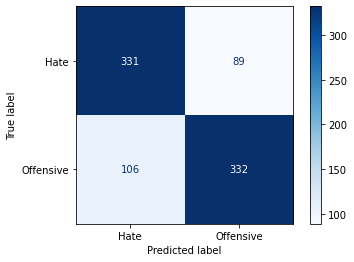

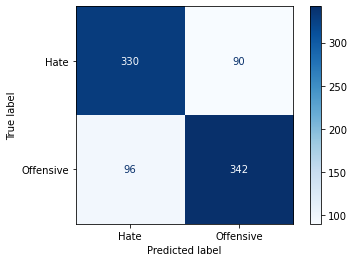

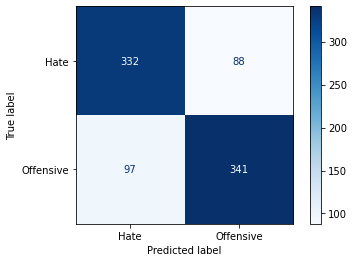

In [245]:
uni_sets = [df_small_uni, df_medium_uni, df_large_uni]

for data in uni_sets:
    features = data.drop(columns = 'class')
    labels = data['class']
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 123)
    y_pred_base_lr = lr.fit(X_train, y_train).predict(X_test)
    report = classification_report(y_test, y_pred_base_lr)
    print(report)
    plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

### Run Random Forest on all 3

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       420
           1       0.77      0.73      0.75       438

    accuracy                           0.75       858
   macro avg       0.75      0.75      0.75       858
weighted avg       0.75      0.75      0.75       858

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       420
           1       0.77      0.77      0.77       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       420
           1       0.74      0.82      0.77       438

    accuracy                           0.76       858
   macro avg       0.76      0.76      0.76       858
weighted avg       0.76      0.76      0.76       858



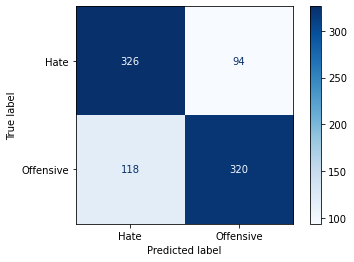

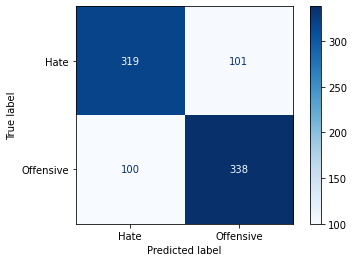

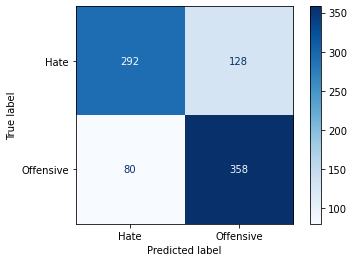

In [246]:
uni_sets = [df_small_uni, df_medium_uni, df_large_uni]

for data in uni_sets:
    features = data.drop(columns = 'class')
    labels = data['class']
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 123)
    y_pred_base_rf = rf.fit(X_train, y_train).predict(X_test)
    report = classification_report(y_test, y_pred_base_rf)
    print(report)
    plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

## Extra Tree Feature Importance

In [247]:
from sklearn.ensemble import ExtraTreesClassifier
df = pd.read_csv('tfidf_df.csv')
df.drop(df.columns[0], axis=1,inplace=True)

features = df.drop(columns = 'class')
labels = df['class']

model = ExtraTreesClassifier(n_estimators=10)
model.fit(features, labels)
importance = model.feature_importances_
print(importance)

[0.000e+00 7.455e-05 0.000e+00 ... 1.166e-02 4.742e-03 3.622e-03]


In [248]:
indexes_small = []
for i in range(len(features)):
    if importance[i] > 0.0005:
        indexes_small.append(i)
len(indexes_small)

243

In [249]:
indexes_medium = []
for i in range(len(features)):
    if importance[i] > 0.0001:
        indexes_medium.append(i)
len(indexes_medium)

910

In [251]:
indexes_large = []
for i in range(len(features)):
    if importance[i] > 0.00001:
        indexes_large.append(i)
len(indexes_large)

1530

In [252]:
features_small = []
for i in indexes_small:
    features_small.append(list(features.columns)[i])

df_small_et = df[features_small]
df_small_et['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [253]:
features_medium = []
for i in indexes_medium:
    features_medium.append(list(features.columns)[i])

df_medium_et = df[features_medium]
df_medium_et['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [254]:
features_large = []
for i in indexes_large:
    features_large.append(list(features.columns)[i])

df_large_et = df[features_large]
df_large_et['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Logistic Regression on all 3

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       420
           1       0.78      0.76      0.77       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       420
           1       0.77      0.76      0.76       438

    accuracy                           0.76       858
   macro avg       0.76      0.76      0.76       858
weighted avg       0.76      0.76      0.76       858

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       420
           1       0.77      0.76      0.77       438

    accuracy                           0.76       858
   macro avg       0.76      0.76      0.76       858
weighted avg       0.76      0.76      0.76       858



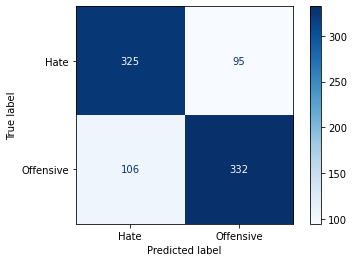

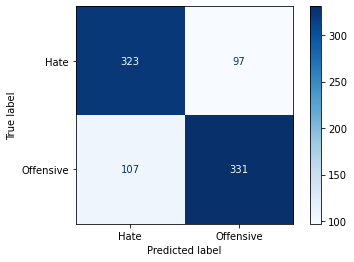

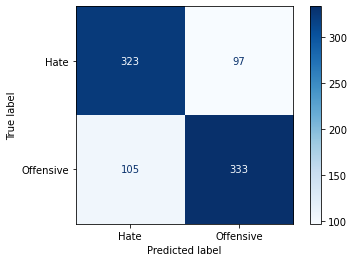

In [255]:
et_sets = [df_small_et, df_medium_et, df_large_et]

for data in et_sets:
    feature = data.drop(columns = 'class')
    label = data['class']
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 123)
    y_pred_base_lr = lr.fit(X_train, y_train).predict(X_test)
    report = classification_report(y_test, y_pred_base_lr)
    print(report)
    plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

## Random Forest on all 3

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       420
           1       0.74      0.76      0.75       438

    accuracy                           0.74       858
   macro avg       0.74      0.74      0.74       858
weighted avg       0.74      0.74      0.74       858

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       420
           1       0.76      0.79      0.78       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       420
           1       0.77      0.80      0.78       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858



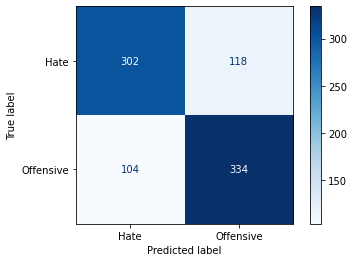

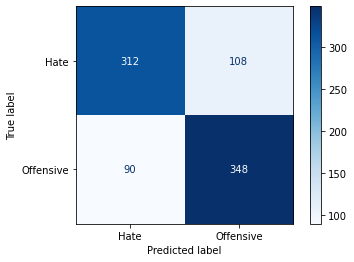

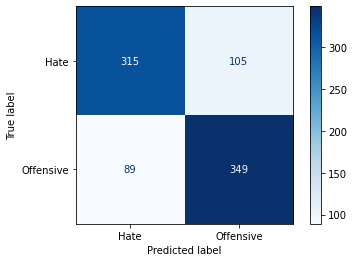

In [256]:
et_sets = [df_small_et, df_medium_et, df_large_et]

for data in et_sets:
    feature = data.drop(columns = 'class')
    label = data['class']
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 123)
    y_pred_base_rf = rf.fit(X_train, y_train).predict(X_test)
    report = classification_report(y_test, y_pred_base_rf)
    print(report)
    plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

## Using only the top TFIDF features

In [257]:
df_count = df.drop('class', axis='columns').sum()
df_largest = df_count.nlargest(500)
df_largest

num_tokens       32635.00
mention_count     2433.00
hashtag_count      347.00
url_count          270.00
bitch              163.68
                   ...   
poor                 2.65
bae                  2.64
actin                2.62
city                 2.62
later                2.62
Length: 500, dtype: float64

In [258]:
len(df_count)

4454

In [259]:
indexes_tfidf = []
for i in range(len(df_count)):
    if df_count[i] > 3.5:
        indexes_tfidf.append(i)
len(indexes_tfidf)

362

In [260]:
features_tfidf = []
for i in indexes_tfidf:
    features_tfidf.append(list(features.columns)[i])

df_tfidf = df[features_large]
df_tfidf['class']=df['class']

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       420
           1       0.77      0.76      0.77       438

    accuracy                           0.76       858
   macro avg       0.76      0.76      0.76       858
weighted avg       0.76      0.76      0.76       858



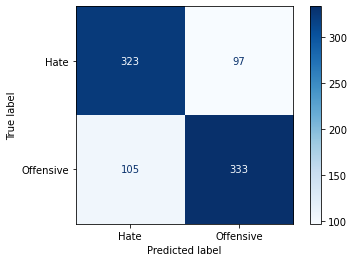

In [261]:
feature = df_tfidf.drop(columns = 'class')
label = df_tfidf['class']
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 123)
y_pred_base_lr = lr.fit(X_train, y_train).predict(X_test)
report = classification_report(y_test, y_pred_base_lr)
print(report)
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       420
           1       0.77      0.79      0.78       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858



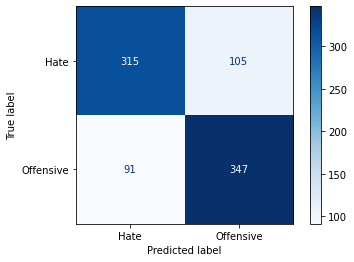

In [262]:
feature = df_tfidf.drop(columns = 'class')
label = df_tfidf['class']
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 123)
y_pred_base_rf = rf.fit(X_train, y_train).predict(X_test)
report = classification_report(y_test, y_pred_base_rf)
print(report)
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

## RFE Using Logistic Regression

In [263]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = df.drop(columns = 'class')
Y = df['class']
model = LogisticRegression(solver='lbfgs', max_iter = 1000)
rfe = RFE(model, 100) 
fit = rfe.fit(X, Y)
#print("Num Features: %d" % fit.nfeatures)
#print("Selected Features: %s" % fit.support)
#print("Feature Ranking: %s" % fit.ranking)
cols = fit.get_support(indices=True)
rfe_small = df.iloc[:,cols]

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [264]:
rfe = RFE(model, 250) 
fit = rfe.fit(X, Y)
#print("Num Features: %d" % fit.nfeatures)
#print("Selected Features: %s" % fit.support)
#print("Feature Ranking: %s" % fit.ranking)
cols = fit.get_support(indices=True)
rfe_medium = df.iloc[:,cols]

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=250 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [265]:
rfe = RFE(model, 500) 
fit = rfe.fit(X, Y)
#print("Num Features: %d" % fit.nfeatures)
#print("Selected Features: %s" % fit.support)
#print("Feature Ranking: %s" % fit.ranking)
cols = fit.get_support(indices=True)
rfe_large = df.iloc[:,cols]

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=500 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Benchmark with Logistic Regression

C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\green\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       420
           1       0.77      0.79      0.78       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       420
           1       0.77      0.79      0.78       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       420
           1       0.77      0.79      0.78       438

    accuracy                           0.77       858
   macro avg       0.77      0.77      0.77       858
weighted avg       0.77      0.77      0.77       858



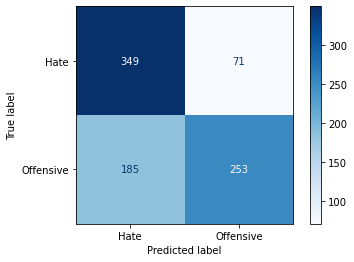

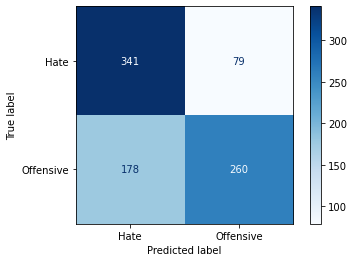

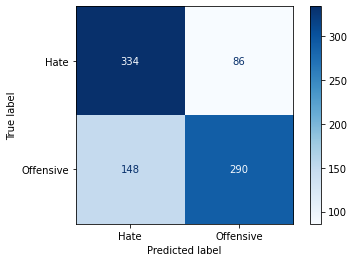

In [266]:
rfe_small['class']=df['class']
rfe_medium['class']=df['class']
rfe_large['class']=df['class']

rfe_sets = [rfe_small, rfe_medium, rfe_large]

for data in rfe_sets:
    feature = data.drop(columns = 'class')
    label = data['class']
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 123)
    y_pred_base_lr = lr.fit(X_train, y_train).predict(X_test)
    report = classification_report(y_test, y_pred_base_rf)
    print(report)
    plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')

## Benchmark with Random Forest

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       420
           1       0.75      0.59      0.66       438

    accuracy                           0.69       858
   macro avg       0.70      0.69      0.69       858
weighted avg       0.70      0.69      0.69       858

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       420
           1       0.72      0.63      0.67       438

    accuracy                           0.69       858
   macro avg       0.69      0.69      0.68       858
weighted avg       0.69      0.69      0.68       858

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       420
           1       0.74      0.69      0.71       438

    accuracy                           0.72       858
   macro avg       0.72      0.72      0.72       858
weighted avg       0.72      0.72      0.72       858



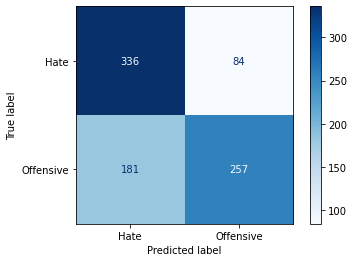

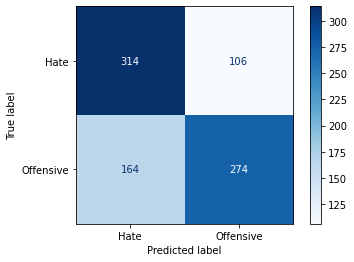

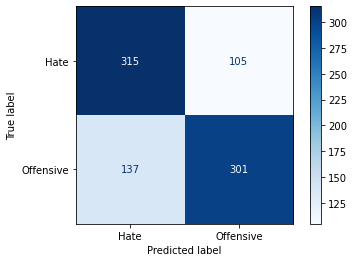

In [267]:
for data in rfe_sets:
    feature = data.drop(columns = 'class')
    label = data['class']
    X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.3, random_state = 123)
    y_pred_base_rf = rf.fit(X_train, y_train).predict(X_test)
    report = classification_report(y_test, y_pred_base_rf)
    print(report)
    plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues, display_labels = class_names, values_format = '')